# ASTR 596: FDS Homework 6: Hunting for Exoplanets


### If you are watching Star Trek: Picard, then you might wonder about the "Admonition" - a warning/message left in an octuple planet system about past synthetic life in the Galaxy.

### [Ethan Siegel's Starts With a Bang blog has even covered it](https://www.forbes.com/sites/startswithabang/2020/03/19/is-star-trek-picards-hypothesized-octuple-star-system-really-possible/)

### The Kepler satellite has discovered many multi-planet systems. You can download artwork for some of them even at the [Exoplanet Travel Bureau](https://exoplanets.nasa.gov/alien-worlds/exoplanet-travel-bureau/)

<img src="Kepler-186f_small.jpg">


### But is there a system with 8 planets??? In fact, there may be at least one - [Kepler 90](https://www.nytimes.com/2017/12/14/science/eight-planets-star-system.html). This along with most other Kepler planets, were not discovered through radial velocity measurements like our example in class (i.e. that nice parameteric model doesn't apply), but were rather discovered through transits - dips in the light of the star as the planet moves around it.


<img src="Transiting-Exoplanet-Light-Curve.gif">

### You get to find 3 exoplanets in the Kepler-90 system with `gatspy`. 


### To get the Kepler data, you'll need the `lightkurve` package

> `conda install lightkurve`

### I've included some code to get the light curve, clean it and remove the NaNs, but not outliers (you can judge the wisdom of outlier removal when you are hunting for planets).


<hr>

#### Hints:

* `gatspy` has a `predict` method that you can use to get a model light curve for some period (you should need no more 3-5 terms). You might find it easier to remove the signal of each planet as you find it and work with the residual light curve to find the next.

* `lightkurve` has a bunch of useful [tutorials](https://docs.lightkurve.org/index.html)

* [The Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html) might be of help

<hr>

# Happy (planet) hunting!

In [398]:
%matplotlib inline
import lightkurve as lk
from gatspy import periodic
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

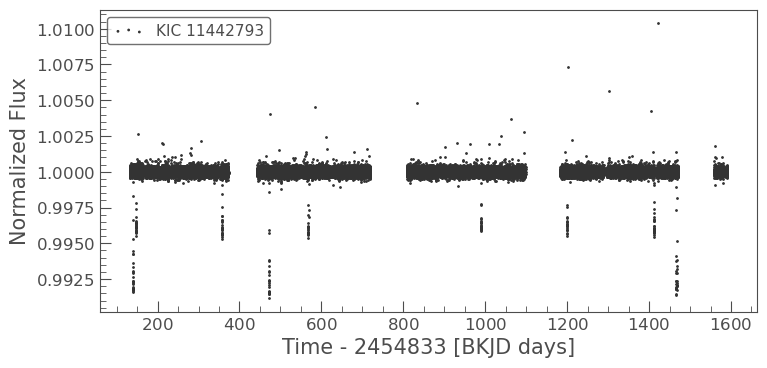

In [399]:
lcfs = lk.search_lightcurvefile('Kepler-90', mission='Kepler').download_all()
def squelch_rednoise(lc):
    corrected_lc = lc.normalize().flatten(window_length=51)
    return corrected_lc

stitched_lc = lcfs.PDCSAP_FLUX.stitch(corrector_func=squelch_rednoise)
clc = stitched_lc.remove_nans()

clc.scatter();

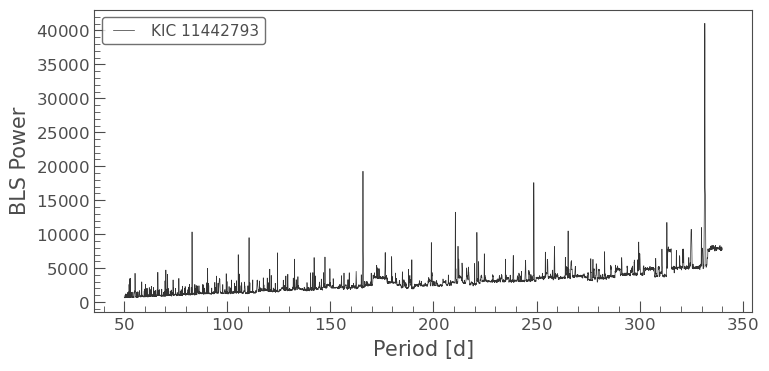

In [400]:
# Make periodogram
periodogram = clc.to_periodogram(method="bls", period=np.arange(50, 340, 0.05))
ax = periodogram.plot()

### Planet 1

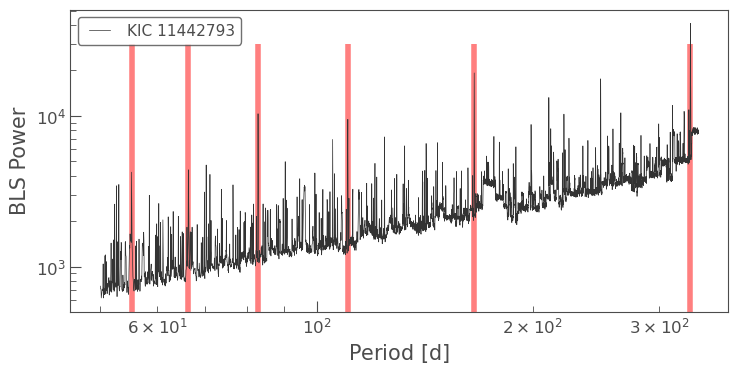

In [401]:
# Find the first period:
ax = periodogram.plot()
ax.set_yscale('log')
ax.set_xscale('log')
best_fit_period = periodogram.period_at_max_power
period_multiples = [best_fit_period.value/i for i in range(1,7)]
ax.vlines(period_multiples,0,3e4,lw=4,color='r',alpha=.5)

331.599999999984 d


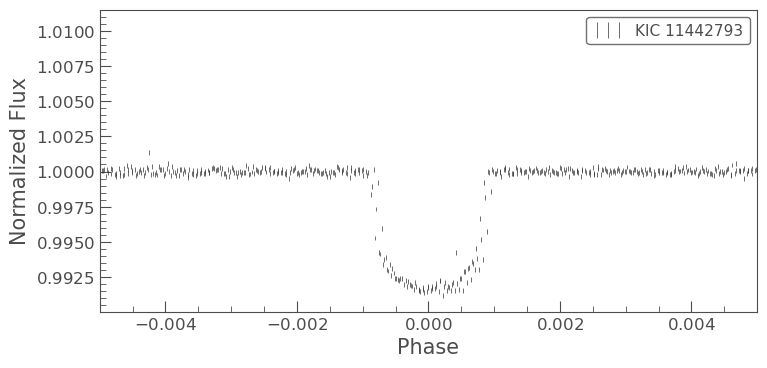

In [402]:
print(best_fit_period)
ax = clc.fold(period=best_fit_period, t0=periodogram.transit_time_at_max_power).errorbar()
ax.set_xlim(-.005,0.005);

### Planet 2

Do this by masking-out the planet 1 transits in the light curve and remaking the periodogram.

210.59999999999084 d


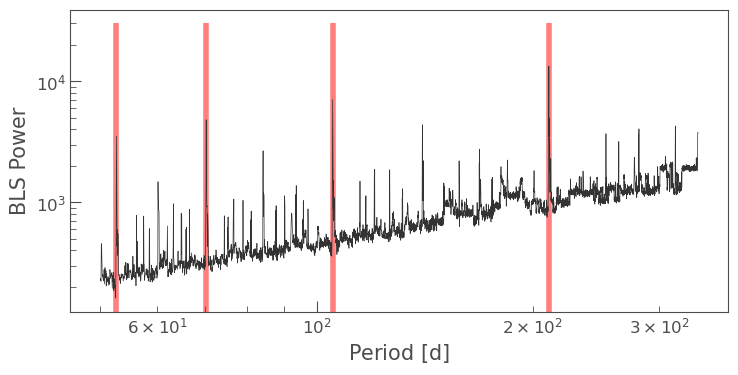

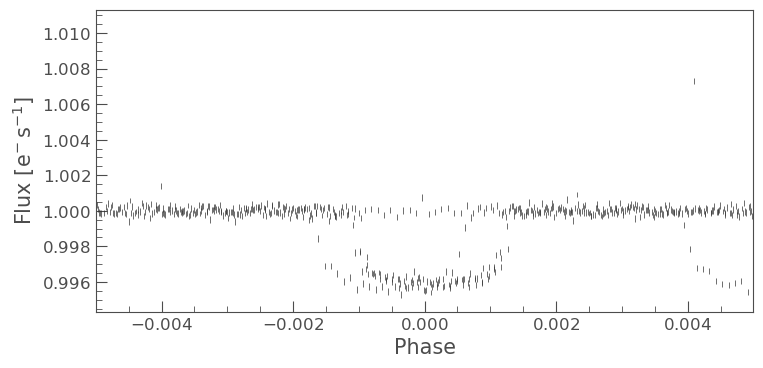

In [403]:
mask = np.ones_like(clc.time)
t0 = periodogram.transit_time_at_max_power

# mask the light curve near the previous transits
transit_times = [t0 + best_fit_period.value*i for i in range(0,20) if t0 + best_fit_period.value*i < np.max(clc.time)]
for i in transit_times:
    indx = (np.abs(clc.time - i)).argmin()
    for j in np.arange(indx-25,indx+25,1):
        if j > 0 and j < len(mask):
            mask[j] = 0

# Mask data
mask=mask.astype(bool)
clc2 = lk.lightcurve.KeplerLightCurve(clc.time[mask],clc.flux[mask],clc.flux_err[mask])

# Make periodogram
periodogram2 = clc2.to_periodogram(method="bls", period=np.arange(50, 340, 0.05))
ax = periodogram2.plot()
ax.set_yscale('log')
ax.set_xscale('log')
best_fit_period2 = periodogram2.period_at_max_power
print(best_fit_period2)
period_multiples2 = [best_fit_period2.value/i for i in range(1,5)]
ax.vlines(period_multiples2,0,3e4,lw=4,color='r',alpha=.5)
plt.show()
# Fold
ax = clc2.fold(period=best_fit_period2, t0=periodogram2.transit_time_at_max_power).errorbar()
ax.set_xlim(-.005,0.005);
plt.show()

### Planet 3

Rinse and repeat. Apologies for the horrifying code.

252.89999999998847 d


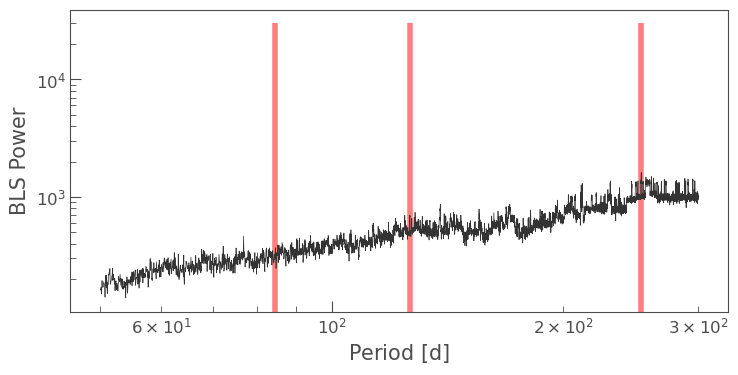

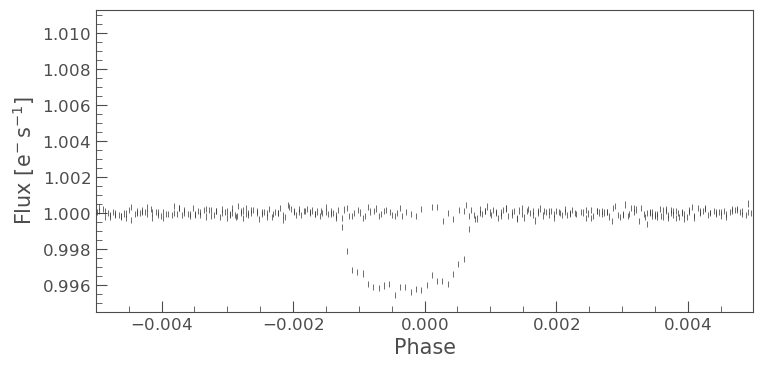

In [409]:
mask = np.ones_like(clc2.time)
t0 = periodogram2.transit_time_at_max_power

# mask the light curve near the previous transits
transit_times = [t0 + best_fit_period2.value*i for i in range(0,20) if t0 + best_fit_period2.value*i < np.max(clc2.time)]
for i in transit_times:
    indx = (np.abs(clc2.time - i)).argmin()
    for j in np.arange(indx-20,indx+20,1):
        if j > 0 and j < len(mask):
            mask[j] = 0

# Mask data
mask=mask.astype(bool)
clc3 = lk.lightcurve.KeplerLightCurve(clc2.time[mask],clc2.flux[mask],clc2.flux_err[mask])

# Make periodogram
periodogram3 = clc3.to_periodogram(method="bls", period=np.arange(50, 300, 0.05))
ax = periodogram3.plot()
ax.set_yscale('log')
ax.set_xscale('log')
best_fit_period3 = periodogram3.period_at_max_power
print(best_fit_period3)
period_multiples3 = [best_fit_period3.value/i for i in range(1,4)]
ax.vlines(period_multiples3,0,3e4,lw=4,color='r',alpha=.5)
plt.show()
# Fold
ax = clc3.fold(period=best_fit_period3, t0=periodogram3.transit_time_at_max_power).errorbar()
ax.set_xlim(-.005,0.005);
plt.show()

Period looks a little bit over-estimated, but close enough to get the idea.

In [410]:
print(best_fit_period3/2)

126.44999999999423 d


### Conclusion

We found 3 planets. The first was easy to find. To find the second, we masked out the light curve near the transit times using the t0 and period we found. To find the third planet repeat the masking process from the previously masked light curve. It is more tricky to find in the periodogram, it gave 2x the integer value of its true period. We can confirm the period is true (and not an integer of fractional multiple) by making a model transit and comparing to the real light curve. Or, we can check wikipedia ;)

### Planets found: period 331 days, 210 days, 126 days.

This is close to the true values of the three longest period planets:
https://en.wikipedia.org/wiki/Kepler-90